In [1]:
import collections
import networkx as nx
import sys
import os
# dir_path = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))
# sys.path.append(dir_path)
sys.path.append(r'c:\\Users\\rotim\\OneDrive\\Documents\\Reading\\graph-code\\Skoltech-PhD-Thesis\\_codes\\SIR\\Influential-nodes-identification-in-complex-networks-via-information-entropy')
from algorithms import *
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pickle

In [2]:
# data_file = 'topo' # 'HepPh'

# G = clean_data(data_file)
# print(nx.number_of_nodes(G), nx.number_of_edges(G))

graph_collections, graph_name = read_graph("./test-graphs")
G = graph_collections[5]
# print(graph_name)


{'ABILENE': {'index': 0, 'nodes': 11, 'edges': 14}, 'ABVT': {'index': 1, 'nodes': 23, 'edges': 31}, 'AGIS': {'index': 2, 'nodes': 25, 'edges': 30}, 'ARN.GRAPHML': {'index': 3, 'nodes': 30, 'edges': 29}, 'BELLCANADA': {'index': 4, 'nodes': 48, 'edges': 64}, 'BELLSOUTH.GRAPHML': {'index': 5, 'nodes': 51, 'edges': 66}, 'BICS.GRAPHML': {'index': 6, 'nodes': 33, 'edges': 48}, 'CERNET.GRAPHML': {'index': 7, 'nodes': 41, 'edges': 58}, 'CESNET200706.GRAPHML': {'index': 8, 'nodes': 44, 'edges': 51}, 'CHINANET.GRAPHML': {'index': 9, 'nodes': 42, 'edges': 66}, 'COGENTCO.GRAPHML': {'index': 10, 'nodes': 197, 'edges': 243}, 'COLT.GRAPHML': {'index': 11, 'nodes': 153, 'edges': 177}, 'DELTACOM.GRAPHML': {'index': 12, 'nodes': 113, 'edges': 161}, 'GARR201110.GRAPHML': {'index': 13, 'nodes': 59, 'edges': 74}, 'GEANT2001': {'index': 14, 'nodes': 27, 'edges': 38}, 'GRNET.GRAPHML': {'index': 15, 'nodes': 37, 'edges': 42}, 'INTELLIFIBER.GRAPHML': {'index': 16, 'nodes': 73, 'edges': 95}, 'INTEROUTE.GRAPHML'

Our Model

In [5]:
# geo_loc_data = get_geo_data("Internet2LatLong.csv")
# print(geo_loc_data)
geo_loc_data = {k: {"lat": v.get('Latitude', 0), "long": v.get('Longitude', 0)}
                for (k, v) in G.nodes(data=True)}
# print(geo_loc_data)
edge_geo_data_combined = assign_location(G, geo_loc_data)
# print(edge_geo_data_combined)
# print(edge_geo_data_combined)
# set edge attributes
set_edge_attr(G, edge_geo_data_combined)
# print(edge_geo_data_combined)
# obtain the node degrees and edges weights to desired lengths
tmp_t = list(range(1, 5))
tmp_t_SN, tmp_t_hub = hubs_SN_NS(G, tmp_t)
# print()
G = graph_collections[0]
# print("hub: ", hubs_SN_NS(G, tmp_t))
combined_dict, combined_dict_k_2 = varying_examples(
    tmp_t_SN[0][1], tmp_t_hub[1][2])

# Get ranked result
opti_rank, ranked_nodes = rank_result(combined_dict, combined_dict_k_2)
print()
# print(opti_rank )

# print( ranked_nodes )

# all_graphs = [{i,each_graph}]


In [20]:
geo_loc_data_all = {i: {k: {"lat": v.get('Latitude', 0), "long": v.get('Longitude', 0)}
     for (k, v) in g.nodes(data=True)} for i, g in zip(graph_name, graph_collections)}
geo_loc_data_all
edge_geo_data_combined_all = {k: assign_location(g, v) for (k, v), g in zip(geo_loc_data_all.items(), graph_collections)}
# print(edge_geo_data_combined_all)
[set_edge_attr(g, v[1]) for (v ,g) in zip(edge_geo_data_combined_all.items(), graph_collections)]

tmp_t = list(range(1, 3))
combi_ = {k: hubs_SN_NS(g, tmp_t) for g,k in zip(graph_collections, graph_name)}
# combi_["ABILENE"]
all_ranks = {k: [rank_result(*varying_examples(v_[0][1], v_[1][2])) for v_ in v]
 for k, v in combi_.items()}
edge_geo_data_combined_all
all_ranks


{'ABILENE': [([('7', 0.9838998211091234),
    ('8', 0.8496732026143791),
    ('9', 0.8496732026143791),
    ('10', 0.8496732026143791),
    ('6', 0.6406685236768802),
    ('4', 0.27027027027027006)],
   [('7', 0.9838998211091234),
    ('8', 0.8496732026143791),
    ('9', 0.8496732026143791),
    ('10', 0.8496732026143791),
    ('6', 0.6406685236768802),
    ('4', 0.27027027027027006),
    ('5', -0.6406685236768802),
    ('1', -0.8496732026143791),
    ('2', -0.8496732026143791),
    ('0', -0.9838998211091234),
    ('3', -0.9838998211091234)]),
  ([('8', 0.9996544507391874),
    ('7', 0.9903417329545919),
    ('5', 0.913923054013733),
    ('6', 0.853760811113167),
    ('9', 0.1873555926122254),
    ('4', 0.1671317865662434)],
   [('8', 0.9996544507391874),
    ('7', 0.9903417329545919),
    ('5', 0.913923054013733),
    ('6', 0.853760811113167),
    ('9', 0.1873555926122254),
    ('4', 0.1671317865662434),
    ('3', -0.3507215379470945),
    ('10', -0.7316468903822807),
    ('1', -0.984

In [34]:
# print(edge_geo_data_combined_all)
# [set_edge_attr(g, v[1]) for (v, g) in zip(
#     edge_geo_data_combined_all.items(), graph_collections)]
# [e for e in edge_geo_data_combined_all['ABILENE'].edges]
# set_edge_attr(graph_collections[0], edge_geo_data_combined_all['ABILENE'])
[{k:[e for e in  f.edges(data=True)]} for f,k in zip(graph_collections,graph_name)]
# {k:{e for e in  f.edges(data=True)} for f,k in zip(graph_collections,graph_name)}

# print(edge_)
# graph_collections
# [[e for e in f] for f in graph_collections.edges(data=True)]


[{'ABILENE': [('0',
    '1',
    {'LinkType': 'OC-192',
     'LinkLabel': 'OC-192c',
     'LinkNote': 'c',
     'key': 0,
     'weight': 9.22}),
   ('0',
    '2',
    {'LinkType': 'OC-192',
     'LinkLabel': 'OC-192c',
     'LinkNote': 'c',
     'key': 0,
     'weight': 2.643}),
   ('1',
    '10',
    {'LinkType': 'OC-192',
     'LinkLabel': 'OC-192c',
     'LinkNote': 'c',
     'key': 0,
     'weight': 2.119}),
   ('2',
    '9',
    {'LinkType': 'OC-192',
     'LinkLabel': 'OC-192c',
     'LinkNote': 'c',
     'key': 0,
     'weight': 7.016}),
   ('3',
    '4',
    {'LinkType': 'OC-192',
     'LinkLabel': 'OC-192c',
     'LinkNote': 'c',
     'key': 0,
     'weight': 9.162}),
   ('3',
    '6',
    {'LinkType': 'OC-192',
     'LinkLabel': 'OC-192c',
     'LinkNote': 'c',
     'key': 0,
     'weight': 13.206}),
   ('4',
    '5',
    {'LinkType': 'OC-192',
     'LinkLabel': 'OC-192c',
     'LinkNote': 'c',
     'key': 0,
     'weight': 4.049}),
   ('4',
    '6',
    {'LinkType': 'OC-192'

In [19]:
max_ = len(opti_rank)/nx.number_of_nodes(G)  # 0.16
max_topk = round(max_ * nx.number_of_nodes(G))
print(max_topk)

degreerank = degree(G, max_topk)
print('degreerank: ', degreerank)
degreerank_non = degree_non(G, max_topk)
print('degreerank_non :', degreerank_non)

node_strength_rank_1 = sorted([(i, sum(hub_information(G, i, 1))) for (i, j) in list(G.degree())],
                              key=lambda item: item[1], reverse=True)[:max_topk]
print("node_strength_rank_1: ",node_strength_rank_1)

node_strength_rank_2 = sorted([(i, sum(hub_information(G, i, 2))) for (i, j) in list(G.degree())],
                              key=lambda item: item[1], reverse=True)[:max_topk]
print("node_strength_rank_2: ", node_strength_rank_2)

node_step_nbr_1 = sorted([(i, len(n_neighbor(G, i, 1))) for (i, j) in list(G.degree())],
                         key=lambda item: item[1], reverse=True)[:max_topk]
print("node_step_nbr_1: ",node_step_nbr_1)

node_step_nbr_2 = sorted([(i, len(n_neighbor(G, i, 2))) for (i, j) in list(G.degree())],
                         key=lambda item: item[1], reverse=True)[:max_topk]
print("node_step_nbr_2: ",node_step_nbr_2)


newmethod_rank = EnRenewRank(G, max_topk, 2)
print('newmethod_rank: ', newmethod_rank)

kshell_rank = kshell(G, max_topk)
print('kshell_rank: ', kshell_rank)
kshell_rank_non = kshell_non(G, max_topk)
print('kshell_rank_non: ', kshell_rank_non)


8
degreerank:  [('77', ' '), ('7', ' '), ('18', ' '), ('9', ' '), ('33', ' '), ('46', ' '), ('50', ' '), ('53', ' ')]
degreerank_non : [('77', ' '), ('7', ' '), ('18', ' '), ('33', ' '), ('46', ' '), ('50', ' '), ('53', ' '), ('91', ' ')]
node_strength_rank_1:  [('86', 221.86399999999998), ('85', 221.12499999999997), ('84', 219.827), ('82', 218.97200000000004), ('78', 217.668), ('79', 217.279), ('62', 145.156), ('9', 76.601)]
node_strength_rank_2:  [('86', 743.576), ('62', 725.259), ('85', 593.064), ('78', 581.7270000000001), ('82', 513.005), ('79', 507.846), ('84', 440.46000000000004), ('7', 387.01399999999995)]
node_step_nbr_1:  [('77', 6), ('7', 5), ('18', 5), ('9', 4), ('33', 4), ('46', 4), ('50', 4), ('53', 4)]
node_step_nbr_2:  [('7', 13), ('77', 12), ('109', 12), ('50', 11), ('119', 11), ('133', 11), ('9', 10), ('18', 10)]
newmethod_rank:  [('7', 0.37595353297205214), ('77', 0.3535279413880523), ('18', 0.31798976336822526), ('50', 0.2802872664083294), ('91', 0.2802872664083294),

## Different Lambda $(\lambda)$

In [20]:
infect_prob = compute_probability(G) * 1.5
avg = 100
max_iter = 200000
topk = round(max_ * nx.number_of_nodes(G))

degreerank_result = []
degreerank_non_result = []
vote_result = []
vote_non_result = []
newmethod_result = []
newmethod_non_result = []
kshell_result = []
kshell_non_result = []
evbrM_result = []
node_strength_rank_1_result = []
node_strength_rank_2_result = []
node_step_nbr_1_result = []
node_step_nbr_2_result = []
# atio = [a/10 for a in list(range(10, 21, 2))]

for a in tqdm(range(10, 21, 2)):
    atio = a / 10
    cover_prob = infect_prob / atio
    degreerank_result.append(get_sir_result(G, degreerank, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    # degreerank_non_result.append(get_sir_result(G, degreerank_non, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    # vote_result.append(get_sir_result(G, vote, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    # vote_non_result.append(get_sir_result(G, vote_non, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    newmethod_result.append(get_sir_result(G, newmethod_rank, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    kshell_result.append(get_sir_result(G, kshell_rank, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    kshell_non_result.append(get_sir_result(G, kshell_rank_non, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    evbrM_result.append(get_sir_result(G, opti_rank, topk, avg,infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    node_strength_rank_1_result.append(get_sir_result(G, node_strength_rank_1, topk, avg,infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    node_strength_rank_2_result.append(get_sir_result(G, node_strength_rank_2, topk, avg,infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    node_step_nbr_1_result.append(get_sir_result(G, node_step_nbr_1, topk, avg,infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    node_step_nbr_2_result.append(get_sir_result(G, node_step_nbr_2, topk, avg,infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))


100%|██████████| 6/6 [00:06<00:00,  1.09s/it]


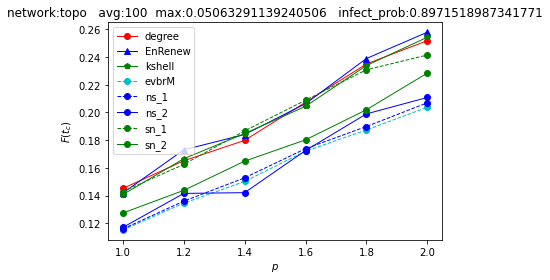

In [22]:
%matplotlib inline
plt.title('network:{}   avg:{}  max:{}   infect_prob:{}'.format(data_file, avg, max_, infect_prob))
plt.plot(np.array(range(10, 21, 2)) / 10, degreerank_result, 'r-o', label='degree', linewidth=1.0, )
# plt.plot(np.array(range(10, 21, 2)) / 10, degreerank_non_result, 'r--o', label='degree_non', linewidth=1.0, )
# plt.plot(np.array(range(10, 21, 2)) / 10, vote_result, 'y-s', label='vote', linewidth=1.0, )
# plt.plot(np.array(range(10, 21, 2)) / 10, vote_non_result, 'y--s', label='vote_non', linewidth=1.0, )
plt.plot(np.array(range(10, 21, 2)) / 10, newmethod_result, 'b-^', label='EnRenew', linewidth=1.0, )
plt.plot(np.array(range(10, 21, 2)) / 10, kshell_result, 'g-p', label='kshell', linewidth=1.0, )
# plt.plot(np.array(range(10, 21, 2)) / 10, kshell_non_result, 'g--p', label='kshell_non', linewidth=1.0, )
plt.plot(np.array(range(10, 21, 2)) / 10, evbrM_result, 'c--o', label='evbrM', linewidth=1.0, )
plt.plot(np.array(range(10, 21, 2)) / 10, node_strength_rank_1_result, 'b--o', label='ns_1', linewidth=1.0, )
plt.plot(np.array(range(10, 21, 2)) / 10, node_strength_rank_2_result, 'b-o', label='ns_2', linewidth=1.0, )
plt.plot(np.array(range(10, 21, 2)) / 10, node_step_nbr_1_result, 'g--o', label='sn_1', linewidth=1.0, )
plt.plot(np.array(range(10, 21, 2)) / 10, node_step_nbr_2_result, 'g-o', label='sn_2', linewidth=1.0, )
plt.legend(loc="upper left")
plt.ylabel("$F(t_c)$")
plt.xlabel('$p$')
plt.show()


In [16]:
node_cluster = cluster_optimal_nodes(G, opti_rank)
node_cluster

[('6', set()), ('3', {'0', '1'}), ('5', {'2', '4'})]